## **Chapter 7 – LLMs and Automation**

This chapter explores how LLMs act as intelligent assistants for **automation in chemistry**. We highlight two main areas:  

- **Coding tasks**: generating, refining, and debugging code for chemical computations and data analysis.  
- **Laboratory operations**: integrating with lab automation systems, where LLMs can design and direct experiments.  

We also introduce AI-driven agents that combine LLM reasoning with external tools (databases, instruments, simulations) and multimodal systems that interpret spectra or images.  

By the end, readers will see how LLMs can serve as both **on-demand programmers and lab partners**, streamlining scientific workflows and enabling smarter automation.  


### 7.1.1 Script Generation for Cheminal Computations
Often, LLM-powered assistants are familiar with common **chemoinformatics libraries**. For example, they may suggest using **RDKit** when manipulating molecules, since it is widely used and appears in their training data. This means LLMs can generate code tailored to chemistry tasks, acting like a combined *chemist-programmer*.  

One caveat: the LLM’s knowledge may not cover the latest library versions or very niche libraries. Users should always verify that suggested code is valid and up to date.  

Below is an example showing how to use the OpenAI API to have GPT generate a Python function for computing molecular weights from SMILES strings:  


In [ ]:
from openai import OpenAI
from google.colab import userdata
import os
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

# Initialize client (requires OPENAI_API_KEY in environment)
client = OpenAI()

# Prompt describing the desired script
user_request = "Give me a Python function that takes a list of SMILES strings and returns their molecular weights."

# Generate code with GPT-4
response = client.chat.completions.create(
    model="gpt-4",
    messages=[{"role": "user", "content": user_request}],
    temperature=0  # deterministic output for reproducibility
)

# Extract generated code
generated_code = response.choices[0].message.content
print(generated_code)


To calculate the molecular weights of molecules represented by SMILES strings, you can use the RDKit library in Python. RDKit is a collection of cheminformatics and machine learning tools. It includes functionality for computing molecular weights.

Here is a Python function that does this:

```python
from rdkit import Chem
from rdkit.Chem import Descriptors

def calculate_molecular_weights(smiles_list):
    molecular_weights = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            molecular_weights.append(Descriptors.MolWt(mol))
        else:
            molecular_weights.append(None)
    return molecular_weights
```

This function takes a list of SMILES strings as input, converts each SMILES string to a molecule object using RDKit's `MolFromSmiles` function, and then calculates the molecular weight of each molecule using RDKit's `MolWt` function. If a SMILES string cannot be converted to a molecule (for example, if it is not 

Using the generated code as an example and run the cell below

In [ ]:
# LLM-generated function for molecular weight calculation using RDKit
from rdkit import Chem
from rdkit.Chem import Descriptors

def calculate_molecular_weights(smiles_list):
    molecular_weights = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            molecular_weights.append(Descriptors.MolWt(mol))
        else:
            molecular_weights.append(None)
    return molecular_weights

smiles_list = ['CC(=O)OC1=CC=CC=C1C(=O)O', 'CC1=CC=CC=C1']
weights = calculate_molecular_weights(smiles_list)
print(weights)

[180.15899999999996, 92.14099999999999]


### 7.1.2 Automating Data Interpretation and Analysis  

LLMs can automate parts of **data interpretation**, turning raw results (tables, spectra, logs) into human-readable insights. Instead of sifting through numbers or verbose logs, you can prompt an LLM to summarize trends, highlight anomalies, or compare results with literature values.  

For example, after a docking simulation, an LLM might note: *“Binding energies become more negative as ring size increases, suggesting improved affinity. Entry 5 is an outlier, possibly due to steric clash.”*  

This makes LLMs useful as context-aware assistants for spectra interpretation, summarizing long outputs, or checking plausibility against known ranges.  




First, we create a file called **`experiment_notes.txt`** containing a synthetic experiment record. The example below writes a detailed procedure, observations, and results to the file and then displays the first 40 lines using `sed`.  


In [ ]:
# Write a synthetic experiment note to a local file
notes = """Title: Oxidation of Benzyl Alcohol to Benzaldehyde (TEMPO/NaOCl)

Date: 2025-09-07
Objective: Oxidize benzyl alcohol to benzaldehyde under mild conditions.

Reagents:
- Benzyl alcohol (1.00 mmol, 108 mg)
- TEMPO (5 mol%, 0.05 mmol, 7.8 mg)
- KBr (0.50 mmol, 59.5 mg)
- NaOCl (bleach, ~5% w/w, 2.0 mmol equiv.)
- Solvent: CH2Cl2 (5 mL)

Procedure:
1) Benzyl alcohol dissolved in CH2Cl2 (5 mL) at 0 °C.
2) Added TEMPO and KBr, stirred 5 min.
3) NaOCl added dropwise over 10 min, kept at 0–5 °C.
4) Stirred 1 h total, then allowed to warm to RT over final 15 min.
5) Quenched, layers separated; organic layer washed, dried (Na2SO4), concentrated.

Observations:
- Pale orange color after TEMPO addition.
- Slight exotherm during NaOCl addition; temperature maintained below 5 °C.
- TLC (hexanes/EtOAc 8:2): starting material (Rf 0.35) disappears; product spot at Rf 0.55.

Results:
- Crude oil purified by quick plug; obtained benzaldehyde (clear oil).
- Isolated yield: 76% (80 mg).
- 1H NMR (CDCl3): aldehyde proton ~9.99 ppm (s), aromatic region 7.3–7.9 ppm.

Conclusions:
- Oxidation successful with good yield under mild, selective conditions.
- Temperature control during NaOCl addition important to minimize over-oxidation.
- TEMPO/NaOCl/KBr system effective for primary alcohol oxidation."""

# Save notes to file
with open("experiment_notes.txt", "w", encoding="utf-8") as f:
    f.write(notes)

In [ ]:
from openai import OpenAI

client = OpenAI()

# Suppose we have a text file with experiment observations
with open("experiment_notes.txt", "r", encoding="utf-8") as f:
    notes = f.read()

# Formulate a prompt for the LLM to summarize the notes
prompt = f"Summarize the key findings from the following experiment notes:\n{notes}"

# Call GPT-4 to generate a summary
response = client.chat.completions.create(
    model="gpt-4",
    messages=[{"role": "user", "content": prompt}],
    max_tokens=150,
    temperature=0.2  # low randomness for a factual summary
)

# Extract the summary text
summary = response.choices[0].message.content
print("Experiment Summary:\n", summary)


Experiment Summary:
 The experiment aimed to oxidize benzyl alcohol to benzaldehyde under mild conditions using TEMPO, KBr, and NaOCl as reagents. The procedure involved dissolving benzyl alcohol in CH2Cl2, adding TEMPO and KBr, and then adding NaOCl dropwise. The mixture was stirred for an hour and then allowed to warm to room temperature. 

Key findings include:
- The oxidation was successful with a good yield of 76% under mild, selective conditions.
- Temperature control during the addition of NaOCl was crucial to prevent over-oxidation.
- The TEMPO/NaOCl/KBr system proved to be effective for the oxidation of primary alcohol.
- The product, benzaldehyde,


### 7.1.3 Debugging and Code Verification  

LLMs can serve as powerful **debugging assistants**, helping identify errors and suggesting fixes. They can even debug their own generated code in iterative loops:  

1. User provides a task → LLM generates code.  
2. Code is tested or simulated.  
3. If an error occurs, the message is fed back → LLM revises the code.  
4. Repeat until success.  

This self-correcting loop has been applied, for example, to generate and refine robotic protocols for an Opentrons liquid-handling robot.  

Even outside of automation, users can paste buggy code into an LLM chat for on-demand help. The model acts like a **pair programmer**, pointing out common mistakes (e.g., division by zero, uninitialized variables) and suggesting quick fixes.  


In [ ]:
from openai import OpenAI

client = OpenAI()

buggy_code = """
def get_activation_energy(temp, rate):
    import math
    # Arrhenius: rate = A * exp(-Ea/(R*T))
    return -8.314 * temp * math.log(rate)
"""

# Known issue description
error_message = "The output of get_activation_energy is incorrect for known data."

# Prompt the LLM with the buggy code and error
debug_prompt = f"Here is a function:\n{buggy_code}\nIt seems to give wrong results. {error_message}\nPlease suggest a correction."

# Request a fix from GPT-4
debug_response = client.chat.completions.create(
    model="gpt-4",
    messages=[{"role": "user", "content": debug_prompt}],
    temperature=0
)

# Extract and print the suggestion
suggested_fix = debug_response.choices[0].message.content
print("LLM suggests:\n", suggested_fix)


LLM suggests:
 The Arrhenius equation is: rate = A * exp(-Ea/(R*T))

To isolate Ea (activation energy), you would rearrange the equation to: Ea = -R*T*ln(rate/A)

It seems like your function is missing the pre-exponential factor (A) in the equation. Here is the corrected function:

```python
def get_activation_energy(temp, rate, A):
    import math
    # Arrhenius: rate = A * exp(-Ea/(R*T))
    return -8.314 * temp * math.log(rate/A)
```

Now you can call the function with an additional argument for A. For example:

```python
get_activation_energy(300, 0.1, 1e7)
```

Please note that the units of the parameters should be consistent. The universal gas constant R is given in J/(mol*K), so the temperature should be in Kelvin, the rate should be in s^-1, and the activation energy will be in J/mol. The pre-exponential factor A is typically given in s^-1.


OpenAI’s recent function calling feature is built exactly for this: you give the LLM a list of function definitions (names, parameters, and docstrings explaining what they do). When the model “thinks” a function call is the best response, it outputs a JSON object representing the function name and arguments, instead of continuing in plain text. The calling program (which wraps around the LLM) then actually executes the function in the real world (or in a simulation) and returns the result to the LLM. This mechanism ensures that the LLM can’t perform arbitrary operations; it’s constrained to the tools you allow, making its actions more predictable and secure. To ground this in code, here’s a simplified example of setting up function calling for a hypothetical lab scenario using OpenAI’s API:

In [ ]:
from openai import OpenAI
import json

client = OpenAI()

# Define the function (tool) schema
tools = [
    {
        "type": "function",
        "function": {
            "name": "set_temperature",
            "description": "Set the temperature of a device to a target value (in °C).",
            "parameters": {
                "type": "object",
                "properties": {
                    "device": {
                        "type": "string",
                        "description": "Which device to set (e.g., 'heater1', 'oil_bath')."
                    },
                    "temperature": {
                        "type": "number",
                        "description": "Target temperature in Celsius."
                    }
                },
                "required": ["device", "temperature"],
                "additionalProperties": False
            },
        },
    }
]

user_input = "Heat the oil bath to 60 °C."

# Ask the model; let it decide whether to call the tool
resp = client.chat.completions.create(
    model="gpt-4o-mini",  # any tool-capable chat model works (e.g., gpt-4o, gpt-4o-mini)
    messages=[{"role": "user", "content": user_input}],
    tools=tools,
    tool_choice="auto",
    temperature=0
)

msg = resp.choices[0].message

if msg.tool_calls:
    # Handle the first tool call (you can loop if multiple)
    call = msg.tool_calls[0]
    func_name = call.function.name
    try:
        args = json.loads(call.function.arguments or "{}")
    except json.JSONDecodeError:
        args = {}
    print(f"Calling function: {func_name} with args {args}")

    # Example: your actual function implementation
    def set_temperature(device: str, temperature: float):
        print(f"[DEVICE] {device} set to {temperature} °C")

    # Dispatch
    if func_name == "set_temperature":
        set_temperature(**args)
else:
    # Model decided not to call a tool; just print its reply
    print("Model reply:", msg.content or "(no content)")


Calling function: set_temperature with args {'device': 'oil_bath', 'temperature': 60}
[DEVICE] oil_bath set to 60 °C


### 7.2.2 Multimodel Interactions: Beyond Text

Real lab experiments produce **multimodal data**—not just text, but images (TLC plates, spectra, flasks), numbers, or even audio signals. For LLM-driven systems to be useful in labs, they must handle these diverse inputs and outputs.  

**Multimodal LLMs** like GPT-4V can process images alongside text. For example, a photo of a flask showing a color change can be given to the model, which may respond with: *“The solution appears blue.”* This information can then be logged or used by an automated lab agent for decision-making.  

In practice, images can be encoded (e.g., base64) and passed in prompts to the model, allowing the assistant to interpret experimental observations.  

✅ Saved flask_image.jpg


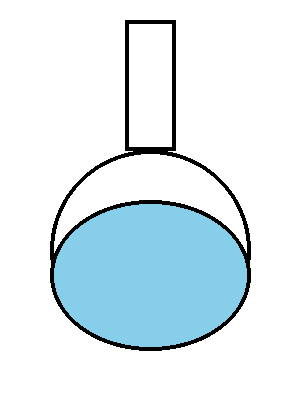

In [ ]:
from PIL import Image, ImageDraw

# Create blank canvas
img = Image.new("RGB", (300, 400), "white")
draw = ImageDraw.Draw(img)

# Draw a round-bottom flask outline
draw.ellipse((50, 150, 250, 350), outline="black", width=4)

# Fill the liquid region (blue liquid)
draw.ellipse((50, 200, 250, 350), fill="skyblue", outline="black", width=4)

# Draw the neck of the flask
draw.rectangle((125, 20, 175, 150), outline="black", width=4, fill="white")

# Save flask image
img.save("flask_image.jpg")
print("✅ Saved flask_image.jpg")

display(img)

In [ ]:
from openai import OpenAI
import base64, pathlib, os

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY", "sk-your-key-here"))

# Read and encode
p = pathlib.Path("flask_image.jpg")
with open(p, "rb") as f:
    b64 = base64.b64encode(f.read()).decode("utf-8")
data_url = f"data:image/jpeg;base64,{b64}"

# Build vision messages
messages = [
    {"role": "system", "content": "You are a lab assistant AI skilled in image analysis."},
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "The attached image shows a flask solution. What color is the liquid?"},
            {"type": "image_url", "image_url": {"url": data_url}}
        ]
    }
]

# Call GPT-4o vision
resp = client.chat.completions.create(
    model="gpt-4o",
    messages=messages,
    temperature=0
)

print("GPT analysis:", resp.choices[0].message.content)


GPT analysis: The liquid in the flask is light blue.


LLMs can be integrated with **other AI components** to handle non-text data. For example, a vision model might detect a flask turning blue, then pass “blue color present” to the LLM, which reasons it could indicate copper sulfate formation.  

Multimodality also extends to **audio and sensors**. Using speech recognition (e.g., Whisper), chemists can issue hands-free voice commands like *“Start titration at 80 degrees”*, which are transcribed to text and executed by the LLM agent. This enables natural, multimodal lab interaction across vision, audio, and other sensor inputs.  


In [ ]:
# --- Setup: install deps (Colab) ---
!pip -q install --upgrade openai gTTS pydub
!apt -y -qq install ffmpeg

# --- 1) Generate a voice command WAV file ---
from gtts import gTTS
from pydub import AudioSegment

TEXT = "Turn on the heater to sixty degrees."
# Save TTS to MP3 first (gTTS outputs mp3), then convert to WAV
gTTS(TEXT, lang="en").save("voice_command.mp3")
AudioSegment.from_file("voice_command.mp3").export("voice_command.wav", format="wav")

print("✅ Generated voice_command.wav")

# --- 2) Display (play) the audio inline ---
from IPython.display import Audio, display
display(Audio("voice_command.wav"))

# --- 3) Transcribe with OpenAI (Whisper) ---
import os
from openai import OpenAI

# Make sure your API key is available (set this securely or via Colab secrets)
# os.environ["OPENAI_API_KEY"] = "sk-your-key-here"

client = OpenAI()

with open("voice_command.wav", "rb") as audio_file:
    transcript = client.audio.transcriptions.create(
        model="whisper-1",       # or "gpt-4o-transcribe" if available to you
        file=audio_file
    )

voice_command_text = transcript.text
print("Transcribed voice command:", voice_command_text)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.6/948.6 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 4.3 MB/s eta 0:00:00
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


✅ Generated voice_command.wav


Transcribed voice command: Turn on the heater to 60 degrees.
